In [1]:
from ultralytics import YOLO
import os
import random
import shutil
import numpy as np
import pandas as pd
import cv2
import yaml
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split

In [6]:
DIR = "./working/datasets/"
IMAGES = DIR +"images/"
LABELS = DIR +"labels/"

TRAIN = "./data/training_images"
TEST = "./data/testing_images"

In [3]:
df = pd.read_csv("./data/train_solution_bounding_boxes (1).csv")
df

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


In [4]:
files = list(df.image.unique())

files_train, files_valid = train_test_split(files, test_size = 0.2)

In [7]:
# make directories
os.makedirs(IMAGES+"train", exist_ok=True)
os.makedirs(LABELS+"train", exist_ok=True)
os.makedirs(IMAGES+"valid", exist_ok=True)
os.makedirs(LABELS+"valid", exist_ok=True)

In [8]:
train_filename = set(files_train)
valid_filename = set(files_valid)
for file in glob.glob(TRAIN+"/*"):
    fname =os.path.basename(file)
    if fname in train_filename:
        shutil.copy(file, IMAGES+"train")
    elif fname in valid_filename:
        shutil.copy(file, IMAGES+"valid")

In [9]:
for _, row in df.iterrows():    
    image_file = row['image']
    class_id = "0"
    x = row['xmin']
    y = row['ymin']
    width = row['xmax'] - row['xmin']
    height = row['ymax'] - row['ymin']

    x_center = x + (width / 2)
    y_center = y + (height / 2)
    x_center /= 676
    y_center /= 380
    width /= 676
    height /= 380

    if image_file in train_filename:   
        annotation_file = os.path.join(LABELS) + "train/" + image_file.replace('.jpg', '.txt')
    else:
        annotation_file = os.path.join(LABELS) + "valid/" + image_file.replace('.jpg', '.txt')
        
    with open(annotation_file, 'a') as ann_file:
        ann_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

In [11]:
import wandb
wandb.init(mode="disabled")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [13]:
%%writefile dataset.yaml
# Path
path: ./cars
train: images/train
val: images/valid

# Classes
nc: 1
names: ['car']

Writing dataset.yaml


In [16]:
model = YOLO('yolov5n.pt')
model.train(data="dataset.yaml", epochs=100, batch=8)

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.1.30 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=

100%|██████████| 755k/755k [00:00<00:00, 15.9MB/s]
2024-03-21 01:31:07.299048: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 01:31:07.299087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 01:31:07.299755: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 43.5MB/s]


AMP: checks passed ✅


train: Scanning /home/xpert/CVhw/dis10/datasets/cars/labels/train... 284 images, 0 backgrounds, 0 corrupt: 100%|██████████| 284/284 [00:00<00:00, 1838.16it/s]

train: New cache created: /home/xpert/CVhw/dis10/datasets/cars/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/xpert/CVhw/dis10/datasets/cars/labels/valid... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<00:00, 1161.71it/s]

val: New cache created: /home/xpert/CVhw/dis10/datasets/cars/labels/valid.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       1.3G      1.407      2.234      1.103          9        640: 100%|██████████| 36/36 [00:02<00:00, 14.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.35it/s]

                   all         71        107      0.878      0.742      0.859       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.38G      1.307      1.394      1.113          5        640: 100%|██████████| 36/36 [00:01<00:00, 23.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.41it/s]

                   all         71        107      0.972      0.648      0.915      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.34G      1.308      1.278      1.129         14        640: 100%|██████████| 36/36 [00:01<00:00, 23.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 20.35it/s]

                   all         71        107      0.979      0.867      0.925      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.31G      1.378      1.226      1.137         13        640: 100%|██████████| 36/36 [00:01<00:00, 23.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 19.56it/s]

                   all         71        107      0.943      0.933       0.98      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.38G      1.352      1.096      1.136          9        640: 100%|██████████| 36/36 [00:01<00:00, 23.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 19.03it/s]

                   all         71        107      0.975      0.944      0.989      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.34G      1.355      1.087      1.155         13        640: 100%|██████████| 36/36 [00:01<00:00, 23.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 17.36it/s]

                   all         71        107      0.984      0.953      0.993      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.39G       1.28      1.014      1.115         17        640: 100%|██████████| 36/36 [00:01<00:00, 21.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 20.59it/s]

                   all         71        107      0.953      0.957       0.98      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.34G      1.258     0.9541      1.083          5        640: 100%|██████████| 36/36 [00:01<00:00, 21.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 20.31it/s]

                   all         71        107      0.946      0.979      0.989      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.39G      1.179     0.8643       1.06          8        640: 100%|██████████| 36/36 [00:01<00:00, 24.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 20.35it/s]

                   all         71        107      0.981      0.969      0.994      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.34G      1.254     0.8648       1.09         12        640: 100%|██████████| 36/36 [00:01<00:00, 21.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 20.88it/s]

                   all         71        107      0.971      0.931      0.978      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.39G      1.223     0.8032       1.08         14        640: 100%|██████████| 36/36 [00:01<00:00, 22.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 26.45it/s]


                   all         71        107      0.954       0.98      0.991      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.34G      1.244     0.7832      1.078         10        640: 100%|██████████| 36/36 [00:01<00:00, 22.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 21.98it/s]

                   all         71        107      0.962      0.951       0.99      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.38G      1.201     0.7548      1.073          8        640: 100%|██████████| 36/36 [00:01<00:00, 22.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 21.13it/s]

                   all         71        107      0.944      0.954      0.989      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.34G      1.163     0.7151      1.054          8        640: 100%|██████████| 36/36 [00:01<00:00, 21.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 19.80it/s]

                   all         71        107      0.981      0.978      0.994      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.38G      1.212     0.7417      1.082         27        640: 100%|██████████| 36/36 [00:01<00:00, 21.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 20.32it/s]

                   all         71        107          1      0.952      0.994      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.34G      1.202     0.7238      1.059         14        640: 100%|██████████| 36/36 [00:01<00:00, 21.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 20.49it/s]

                   all         71        107       0.96      0.991      0.994      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.39G      1.174     0.6934      1.064         17        640: 100%|██████████| 36/36 [00:01<00:00, 21.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 21.57it/s]

                   all         71        107      0.998      0.981      0.995      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.34G      1.141      0.676      1.041         14        640: 100%|██████████| 36/36 [00:01<00:00, 23.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.53it/s]

                   all         71        107      0.971      0.963      0.993      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.38G      1.163      0.675       1.05          6        640: 100%|██████████| 36/36 [00:01<00:00, 23.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 21.54it/s]

                   all         71        107      0.983          1      0.995      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.34G      1.148     0.6561      1.049         12        640: 100%|██████████| 36/36 [00:01<00:00, 22.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 21.34it/s]

                   all         71        107      0.979      0.991      0.995      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.38G      1.134      0.641      1.048          5        640: 100%|██████████| 36/36 [00:01<00:00, 23.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.91it/s]

                   all         71        107       0.97      0.991      0.992       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.34G      1.131     0.6366      1.033         13        640: 100%|██████████| 36/36 [00:01<00:00, 23.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 21.69it/s]

                   all         71        107      0.983      0.991      0.995      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.38G      1.149     0.6341      1.048         11        640: 100%|██████████| 36/36 [00:01<00:00, 22.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.35it/s]

                   all         71        107      0.981      0.988      0.995      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.34G      1.173     0.6459      1.049         16        640: 100%|██████████| 36/36 [00:01<00:00, 23.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.48it/s]

                   all         71        107       0.96      0.972      0.992      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.39G      1.155     0.6315      1.053         18        640: 100%|██████████| 36/36 [00:01<00:00, 23.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.27it/s]

                   all         71        107      0.982          1      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.34G      1.118     0.6076      1.042         22        640: 100%|██████████| 36/36 [00:01<00:00, 23.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.43it/s]

                   all         71        107      0.988      0.981      0.994      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.39G      1.151     0.6264      1.056         22        640: 100%|██████████| 36/36 [00:01<00:00, 23.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.28it/s]

                   all         71        107      0.954      0.972      0.992      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.34G      1.146     0.6156      1.037          8        640: 100%|██████████| 36/36 [00:01<00:00, 23.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.18it/s]

                   all         71        107      0.981          1      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.38G      1.163     0.5984      1.055          7        640: 100%|██████████| 36/36 [00:01<00:00, 24.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.90it/s]

                   all         71        107       0.98          1      0.995      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.34G      1.116     0.6021      1.048          8        640: 100%|██████████| 36/36 [00:01<00:00, 24.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.48it/s]

                   all         71        107      0.994      0.991      0.995      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.39G      1.137     0.6039      1.042         17        640: 100%|██████████| 36/36 [00:01<00:00, 24.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.44it/s]

                   all         71        107      0.991      0.999      0.995      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.34G      1.098     0.5888      1.033          8        640: 100%|██████████| 36/36 [00:01<00:00, 24.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.12it/s]

                   all         71        107      0.972       0.98      0.993      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.38G      1.105     0.5793      1.025         14        640: 100%|██████████| 36/36 [00:01<00:00, 24.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.97it/s]

                   all         71        107      0.991      0.999      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.34G      1.082     0.5789      1.028         10        640: 100%|██████████| 36/36 [00:01<00:00, 22.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 25.08it/s]


                   all         71        107      0.972      0.988      0.993      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.38G      1.102     0.5674      1.025          9        640: 100%|██████████| 36/36 [00:01<00:00, 23.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.86it/s]

                   all         71        107      0.969      0.981       0.99      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.34G      1.096     0.5642      1.033         11        640: 100%|██████████| 36/36 [00:01<00:00, 23.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.86it/s]

                   all         71        107      0.977      0.981      0.994      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.39G      1.064     0.5529      1.009         15        640: 100%|██████████| 36/36 [00:01<00:00, 23.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.88it/s]

                   all         71        107      0.964      0.998      0.993      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.34G      1.101     0.5558      1.048          6        640: 100%|██████████| 36/36 [00:01<00:00, 23.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.93it/s]

                   all         71        107      0.997      0.972      0.994      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.39G      1.084     0.5505      1.033         11        640: 100%|██████████| 36/36 [00:01<00:00, 24.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.67it/s]

                   all         71        107      0.981      0.968      0.992      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.34G      1.071     0.5488      1.021         11        640: 100%|██████████| 36/36 [00:01<00:00, 23.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.58it/s]

                   all         71        107      0.972      0.972      0.993      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.39G      1.098     0.5549      1.025         11        640: 100%|██████████| 36/36 [00:01<00:00, 24.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.91it/s]

                   all         71        107      0.972      0.984      0.994      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.34G      1.052     0.5532      1.013         13        640: 100%|██████████| 36/36 [00:01<00:00, 24.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.42it/s]

                   all         71        107      0.964          1      0.993      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.38G      1.045     0.5369      1.017         15        640: 100%|██████████| 36/36 [00:01<00:00, 24.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.34it/s]

                   all         71        107      0.962      0.991      0.994       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.34G      1.051     0.5342      1.002         10        640: 100%|██████████| 36/36 [00:01<00:00, 23.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 21.93it/s]

                   all         71        107      0.964      0.989      0.993      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.39G      1.028      0.522     0.9946         18        640: 100%|██████████| 36/36 [00:01<00:00, 23.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.44it/s]

                   all         71        107      0.968      0.991      0.994      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.34G      1.054     0.5463      1.019         14        640: 100%|██████████| 36/36 [00:01<00:00, 24.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.97it/s]

                   all         71        107      0.953      0.991      0.993      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.39G      1.043      0.542      1.015         10        640: 100%|██████████| 36/36 [00:01<00:00, 23.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.28it/s]

                   all         71        107      0.962          1      0.994      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.34G      1.015     0.5428      1.012         15        640: 100%|██████████| 36/36 [00:01<00:00, 24.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.57it/s]

                   all         71        107      0.988      0.981      0.994       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.38G      1.058     0.5358      1.014         17        640: 100%|██████████| 36/36 [00:01<00:00, 23.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.65it/s]

                   all         71        107      0.991      0.989      0.994      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.34G      1.033     0.5311      1.002         10        640: 100%|██████████| 36/36 [00:01<00:00, 23.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.88it/s]

                   all         71        107      0.982      0.991      0.995      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.39G      1.022      0.529      1.014         13        640: 100%|██████████| 36/36 [00:01<00:00, 24.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.84it/s]

                   all         71        107      0.973      0.996      0.994       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.34G       1.03     0.5168     0.9972          9        640: 100%|██████████| 36/36 [00:01<00:00, 24.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 25.16it/s]

                   all         71        107      0.978          1      0.994      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.39G     0.9932     0.4977     0.9859         12        640: 100%|██████████| 36/36 [00:01<00:00, 24.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.08it/s]

                   all         71        107      0.972       0.99      0.993      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.34G      1.057      0.512      1.024         11        640: 100%|██████████| 36/36 [00:01<00:00, 24.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.99it/s]

                   all         71        107      0.973      0.998      0.994      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.39G       1.05     0.5005       1.01         11        640: 100%|██████████| 36/36 [00:01<00:00, 24.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.19it/s]

                   all         71        107      0.972      0.989      0.994      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.34G      1.042     0.5058      1.005         17        640: 100%|██████████| 36/36 [00:01<00:00, 24.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.11it/s]

                   all         71        107      0.982          1      0.995      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.38G      1.048     0.5155      1.017         10        640: 100%|██████████| 36/36 [00:01<00:00, 23.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.15it/s]

                   all         71        107      0.981      0.981      0.994      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.34G       1.02     0.4967     0.9899         10        640: 100%|██████████| 36/36 [00:01<00:00, 24.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.19it/s]

                   all         71        107       0.98          1      0.994      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.39G      1.014     0.4962     0.9994         14        640: 100%|██████████| 36/36 [00:01<00:00, 24.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.98it/s]

                   all         71        107      0.981      0.988      0.994      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.34G     0.9843     0.4936     0.9897         12        640: 100%|██████████| 36/36 [00:01<00:00, 24.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 25.61it/s]

                   all         71        107      0.986      0.991      0.995       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.38G     0.9637     0.4846     0.9805         12        640: 100%|██████████| 36/36 [00:01<00:00, 24.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.60it/s]

                   all         71        107      0.991      0.993      0.995      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.34G     0.9893     0.4913     0.9956         12        640: 100%|██████████| 36/36 [00:01<00:00, 23.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.98it/s]

                   all         71        107          1      0.996      0.995      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.39G     0.9699      0.484     0.9764         14        640: 100%|██████████| 36/36 [00:01<00:00, 24.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.00it/s]

                   all         71        107      0.997      0.991      0.995      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.34G     0.9294     0.4641     0.9696          3        640: 100%|██████████| 36/36 [00:01<00:00, 23.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.61it/s]

                   all         71        107      0.989      0.991      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.38G     0.9265     0.4669     0.9733         15        640: 100%|██████████| 36/36 [00:01<00:00, 23.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.87it/s]

                   all         71        107      0.982      0.996      0.994      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.34G     0.9658     0.4852     0.9807         14        640: 100%|██████████| 36/36 [00:01<00:00, 23.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.20it/s]

                   all         71        107      0.989      0.981      0.994      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.39G     0.9458     0.4736     0.9837         11        640: 100%|██████████| 36/36 [00:01<00:00, 23.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.16it/s]

                   all         71        107       0.98      0.991      0.994      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.34G      0.937     0.4677      0.976         14        640: 100%|██████████| 36/36 [00:01<00:00, 24.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 25.07it/s]


                   all         71        107       0.99      0.991      0.995      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.39G     0.9365     0.4668     0.9794         17        640: 100%|██████████| 36/36 [00:01<00:00, 24.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.61it/s]

                   all         71        107      0.991      0.999      0.995      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.34G     0.9266     0.4661     0.9745          3        640: 100%|██████████| 36/36 [00:01<00:00, 24.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.32it/s]

                   all         71        107       0.99          1      0.995      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.38G     0.8994     0.4502     0.9578          9        640: 100%|██████████| 36/36 [00:01<00:00, 23.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.86it/s]

                   all         71        107      0.981          1      0.995      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.34G     0.9365     0.4562     0.9728         11        640: 100%|██████████| 36/36 [00:01<00:00, 24.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.06it/s]

                   all         71        107      0.979      0.991      0.994      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.39G     0.9449     0.4683      0.979         11        640: 100%|██████████| 36/36 [00:01<00:00, 23.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.17it/s]

                   all         71        107      0.981          1      0.994      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.34G     0.9396     0.4694     0.9804         12        640: 100%|██████████| 36/36 [00:01<00:00, 23.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.51it/s]

                   all         71        107      0.981      0.989      0.994      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.38G     0.9049     0.4558     0.9613         12        640: 100%|██████████| 36/36 [00:01<00:00, 24.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.32it/s]

                   all         71        107      0.972      0.989      0.994      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.34G     0.9156     0.4479     0.9723         16        640: 100%|██████████| 36/36 [00:01<00:00, 24.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.04it/s]

                   all         71        107      0.982      0.993      0.994      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.39G     0.8988     0.4536     0.9476         13        640: 100%|██████████| 36/36 [00:01<00:00, 23.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.58it/s]

                   all         71        107      0.987          1      0.994      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.34G     0.9129     0.4562     0.9596         11        640: 100%|██████████| 36/36 [00:01<00:00, 24.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.59it/s]

                   all         71        107      0.989          1      0.994      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.38G     0.9237     0.4591     0.9717         11        640: 100%|██████████| 36/36 [00:01<00:00, 24.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.90it/s]

                   all         71        107       0.98          1      0.994      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.34G     0.8979     0.4413     0.9624         15        640: 100%|██████████| 36/36 [00:01<00:00, 23.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.37it/s]

                   all         71        107      0.991      0.999      0.994      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.38G     0.9234     0.4487     0.9679         16        640: 100%|██████████| 36/36 [00:01<00:00, 23.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.09it/s]

                   all         71        107      0.991          1      0.994      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.34G     0.9139     0.4459     0.9598         13        640: 100%|██████████| 36/36 [00:01<00:00, 23.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.97it/s]

                   all         71        107      0.991          1      0.994      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.38G     0.8759     0.4349     0.9485         11        640: 100%|██████████| 36/36 [00:01<00:00, 23.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.51it/s]

                   all         71        107      0.991      0.999      0.995      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.34G     0.8544      0.428     0.9454         10        640: 100%|██████████| 36/36 [00:01<00:00, 23.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.78it/s]

                   all         71        107      0.989      0.991      0.994      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.38G     0.8982     0.4442      0.958          8        640: 100%|██████████| 36/36 [00:01<00:00, 23.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.56it/s]

                   all         71        107      0.991      0.999      0.994      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.34G     0.8719     0.4322     0.9537         17        640: 100%|██████████| 36/36 [00:01<00:00, 23.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.96it/s]

                   all         71        107      0.972          1      0.994       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.39G      0.887     0.4363     0.9438         17        640: 100%|██████████| 36/36 [00:01<00:00, 23.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.65it/s]

                   all         71        107      0.982          1      0.994      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.34G     0.8776     0.4308     0.9423         11        640: 100%|██████████| 36/36 [00:01<00:00, 23.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.45it/s]

                   all         71        107      0.982      0.999      0.994      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.39G     0.8243     0.4075     0.9288         18        640: 100%|██████████| 36/36 [00:01<00:00, 24.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.70it/s]

                   all         71        107      0.987          1      0.994      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.34G     0.8639     0.4249     0.9571         10        640: 100%|██████████| 36/36 [00:01<00:00, 23.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.31it/s]

                   all         71        107      0.982      0.998      0.994      0.688


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.38G     0.8421     0.4067     0.9518          8        640: 100%|██████████| 36/36 [00:01<00:00, 20.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 21.63it/s]

                   all         71        107       0.98      0.991      0.994      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.34G     0.8363     0.4223     0.9519          4        640: 100%|██████████| 36/36 [00:01<00:00, 23.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.42it/s]

                   all         71        107      0.981      0.975      0.994      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.38G     0.8205     0.4087     0.9401          5        640: 100%|██████████| 36/36 [00:01<00:00, 23.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.65it/s]

                   all         71        107       0.98      0.981      0.994      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.34G     0.8354     0.4055     0.9445          7        640: 100%|██████████| 36/36 [00:01<00:00, 23.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.77it/s]

                   all         71        107      0.973      0.997      0.994      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.38G     0.8206     0.4056     0.9505          4        640: 100%|██████████| 36/36 [00:01<00:00, 24.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.47it/s]

                   all         71        107      0.991       0.98      0.994      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.34G     0.8133     0.3953     0.9317          8        640: 100%|██████████| 36/36 [00:01<00:00, 23.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.61it/s]

                   all         71        107      0.981       0.99      0.994      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.38G     0.8315      0.402     0.9366          5        640: 100%|██████████| 36/36 [00:01<00:00, 24.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.24it/s]

                   all         71        107      0.988      0.981      0.994      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.34G     0.7996     0.3943     0.9378          5        640: 100%|██████████| 36/36 [00:01<00:00, 23.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.41it/s]

                   all         71        107      0.989      0.981      0.994      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.38G     0.7895     0.3844     0.9327          5        640: 100%|██████████| 36/36 [00:01<00:00, 24.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.90it/s]

                   all         71        107      0.989      0.981      0.994      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.34G     0.7799     0.3853     0.9259          8        640: 100%|██████████| 36/36 [00:01<00:00, 24.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 24.38it/s]

                   all         71        107      0.989      0.981      0.994      0.689



100 epochs completed in 0.058 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 5.3MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
YOLOv5n summary (fused): 193 layers, 2503139 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.68it/s]


                   all         71        107      0.991      0.999      0.994      0.697
Speed: 0.3ms preprocess, 0.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc456c46440>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

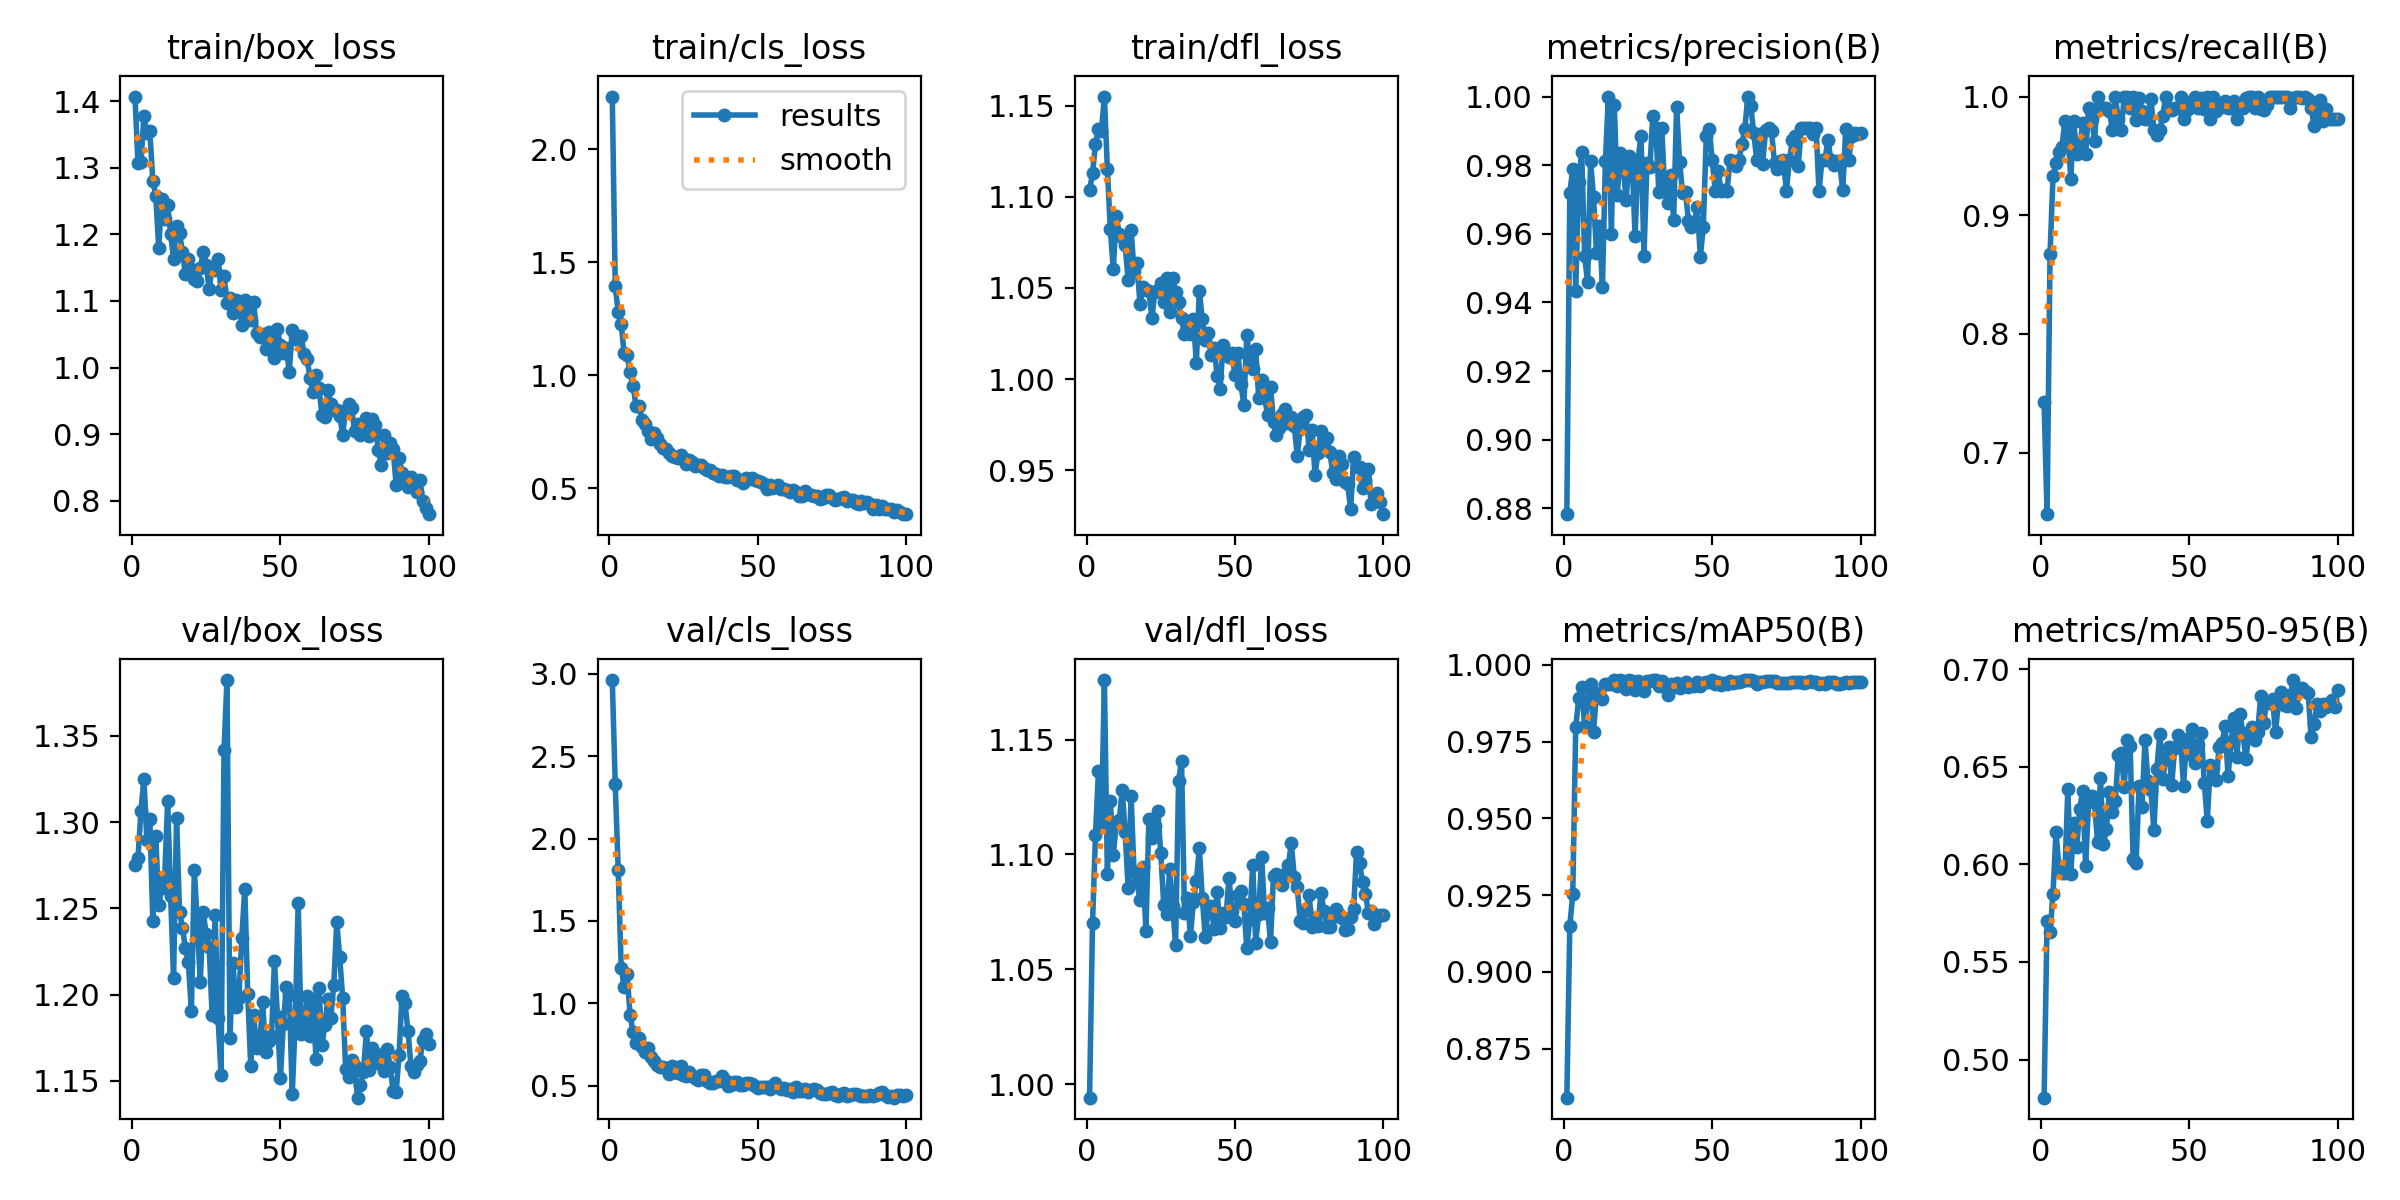

In [19]:
from IPython.display import Image

Image("./runs/detect/train4/results.png")

In [20]:
model = YOLO('./runs/detect/train4/weights/last.pt')
ret = model("./data/testing_images",save=True, conf=0.2, iou=0.5)


image 1/175 /home/xpert/CVhw/dis10/data/testing_images/vid_5_25100.jpg: 384x640 (no detections), 56.5ms
image 2/175 /home/xpert/CVhw/dis10/data/testing_images/vid_5_25120.jpg: 384x640 (no detections), 3.9ms
image 3/175 /home/xpert/CVhw/dis10/data/testing_images/vid_5_25140.jpg: 384x640 (no detections), 3.6ms
image 4/175 /home/xpert/CVhw/dis10/data/testing_images/vid_5_25160.jpg: 384x640 (no detections), 3.9ms
image 5/175 /home/xpert/CVhw/dis10/data/testing_images/vid_5_25180.jpg: 384x640 (no detections), 4.5ms
image 6/175 /home/xpert/CVhw/dis10/data/testing_images/vid_5_25200.jpg: 384x640 (no detections), 3.7ms
image 7/175 /home/xpert/CVhw/dis10/data/testing_images/vid_5_25220.jpg: 384x640 (no detections), 5.6ms
image 8/175 /home/xpert/CVhw/dis10/data/testing_images/vid_5_25240.jpg: 384x640 (no detections), 3.8ms
image 9/175 /home/xpert/CVhw/dis10/data/testing_images/vid_5_25260.jpg: 384x640 (no detections), 4.0ms
image 10/175 /home/xpert/CVhw/dis10/data/testing_images/vid_5_26320.jpg

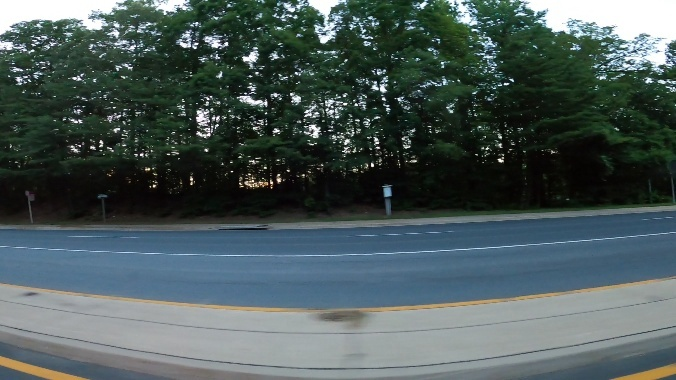

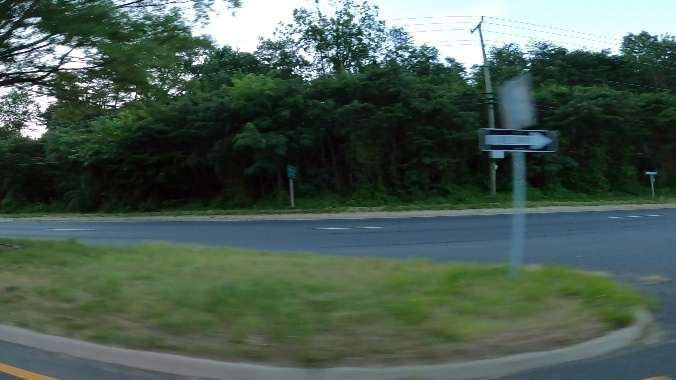

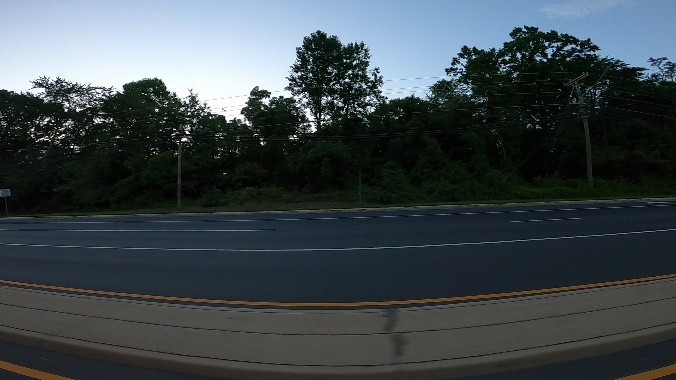

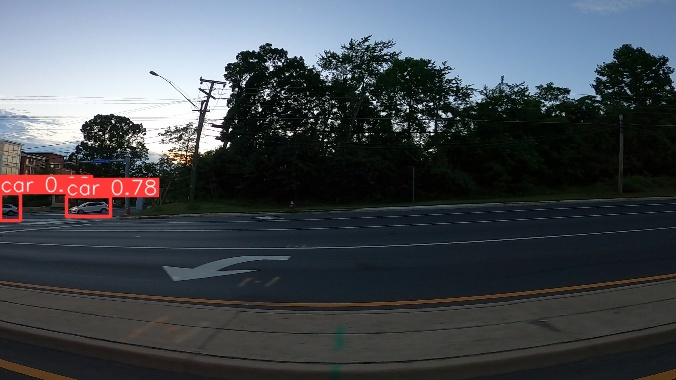

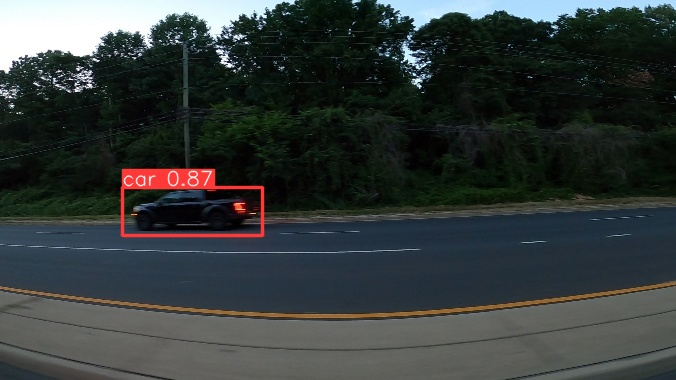

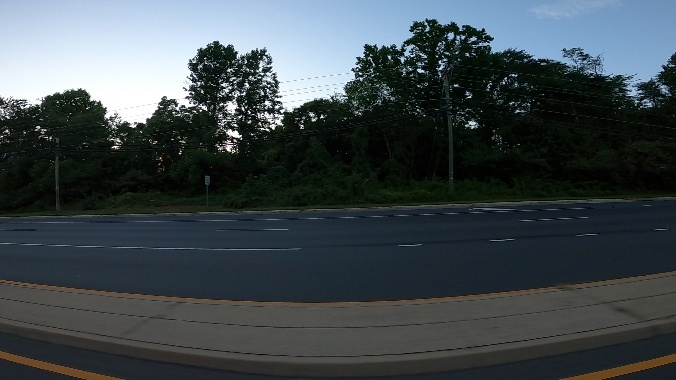

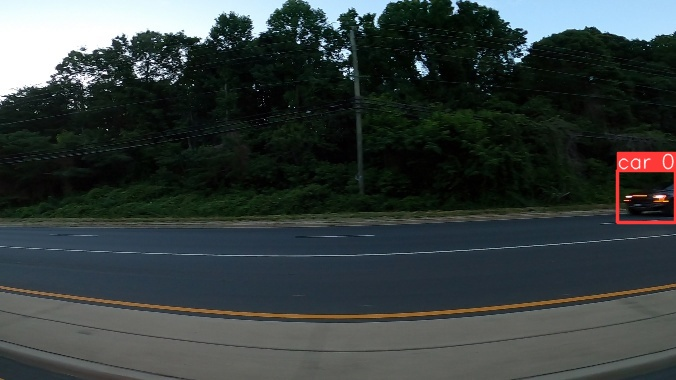

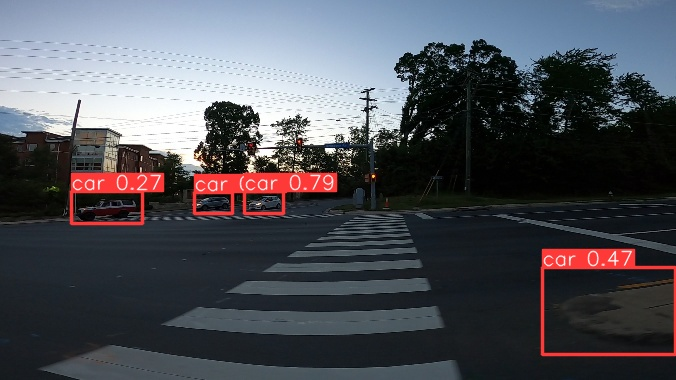

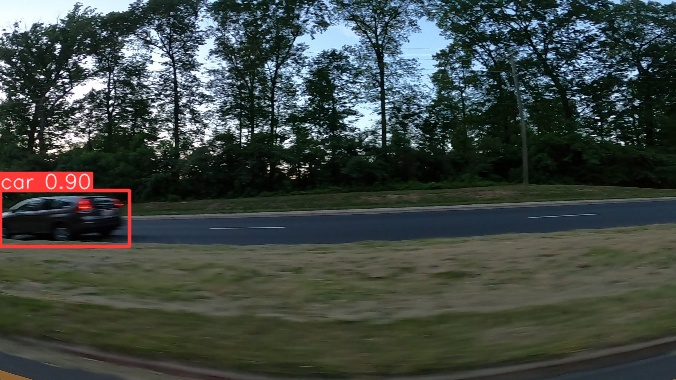

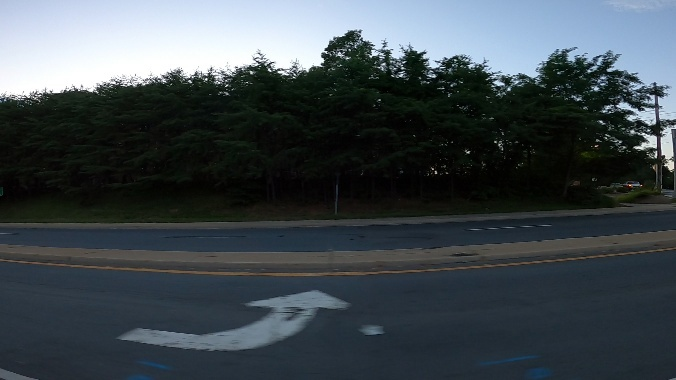

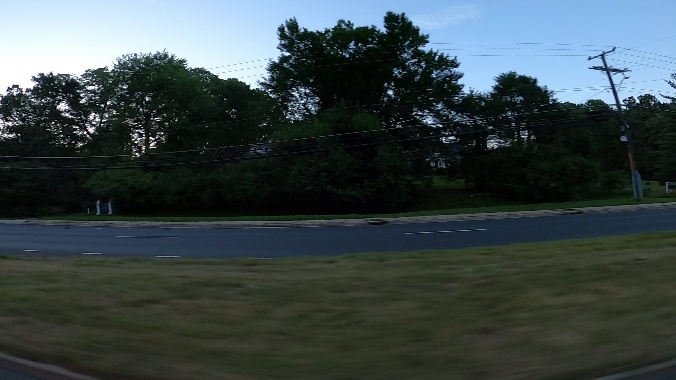

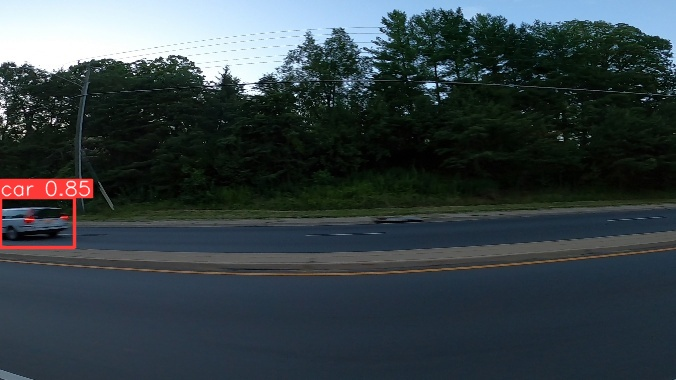

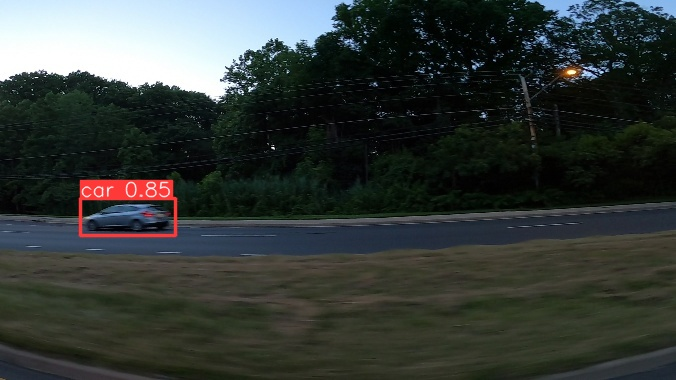

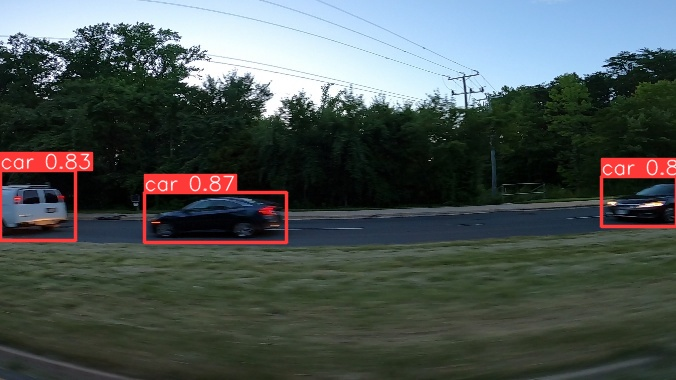

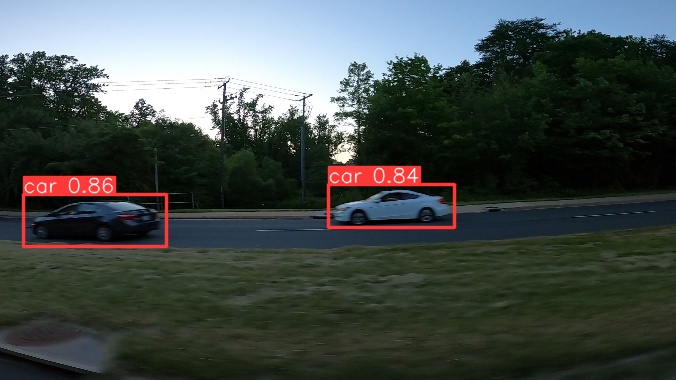

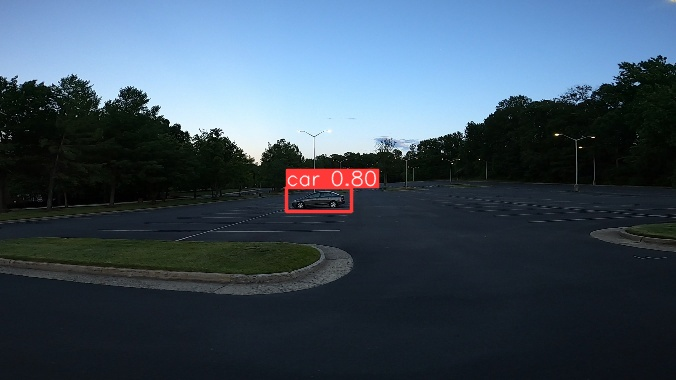

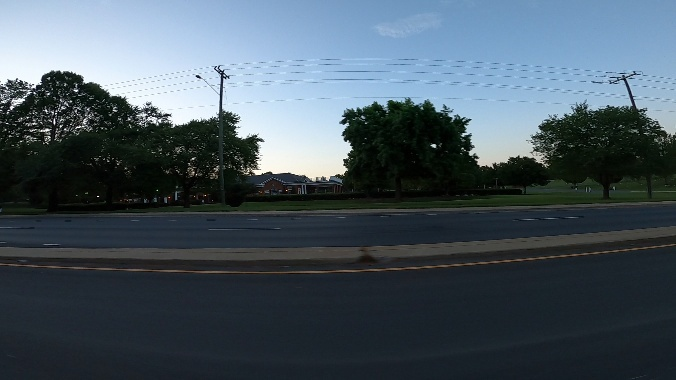

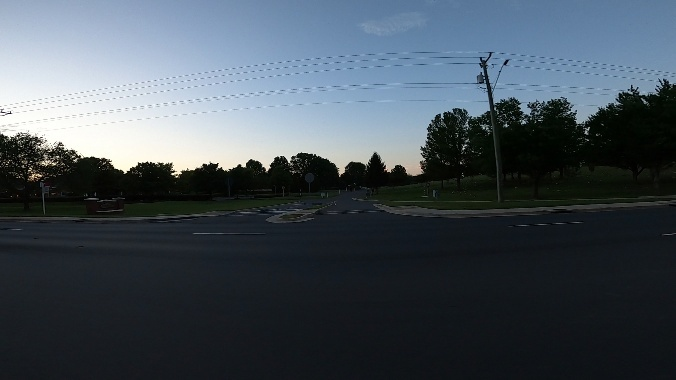

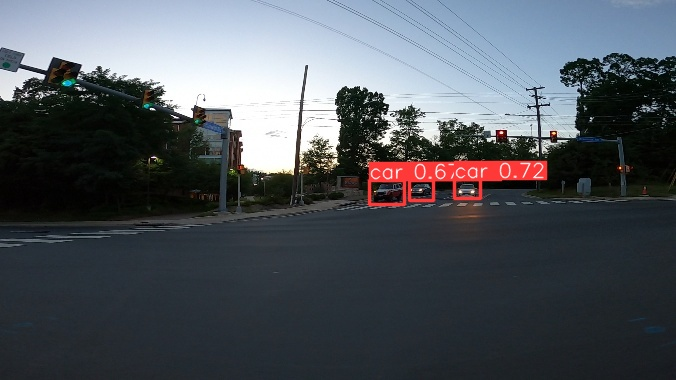

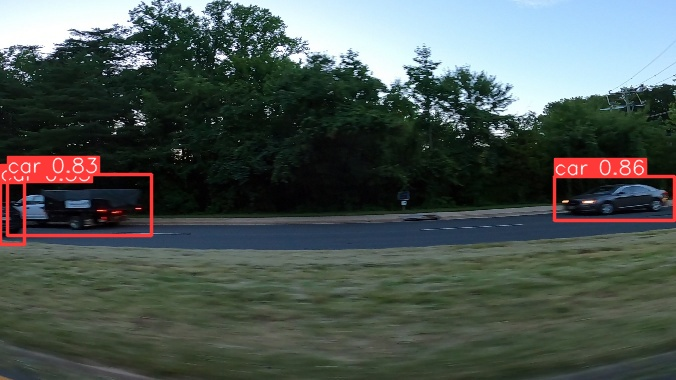

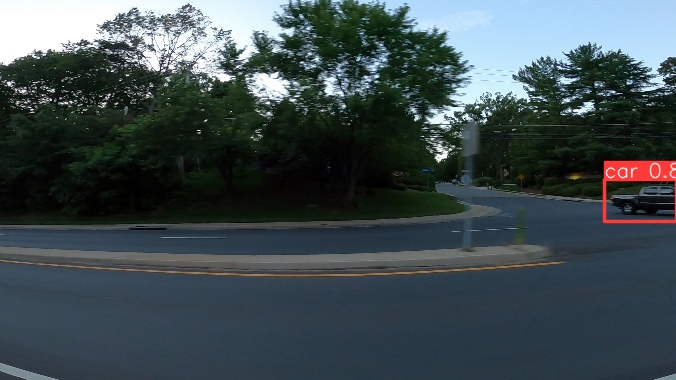

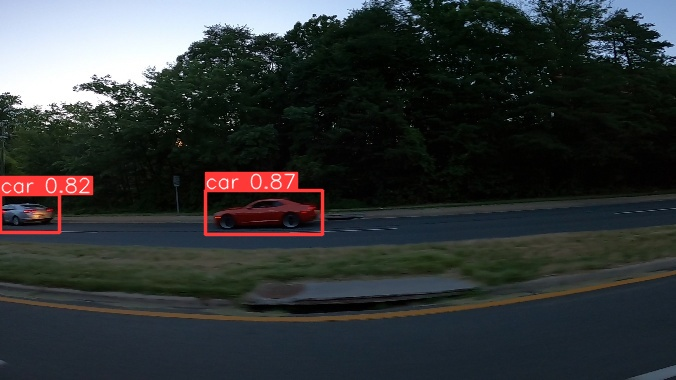

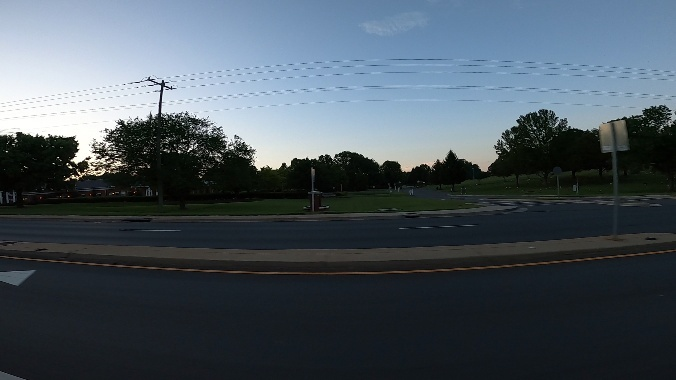

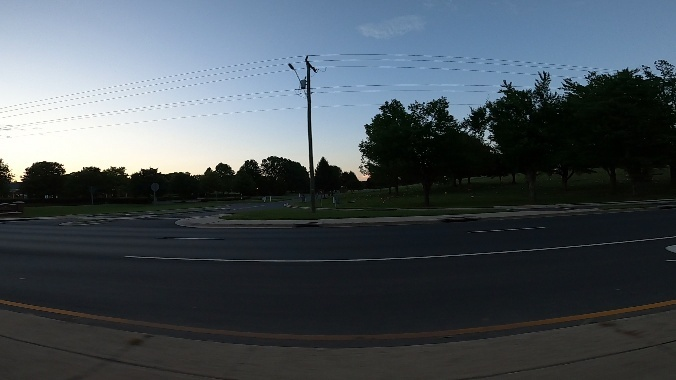

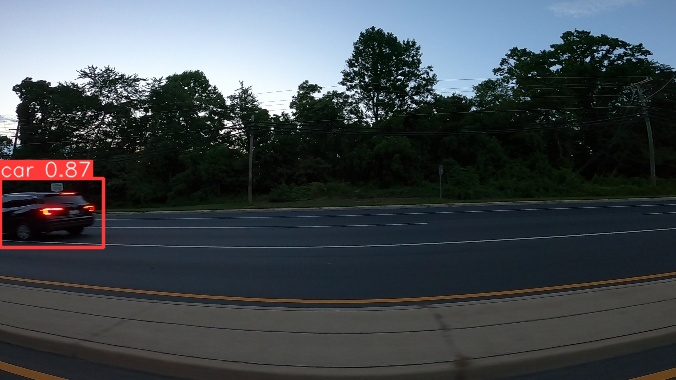

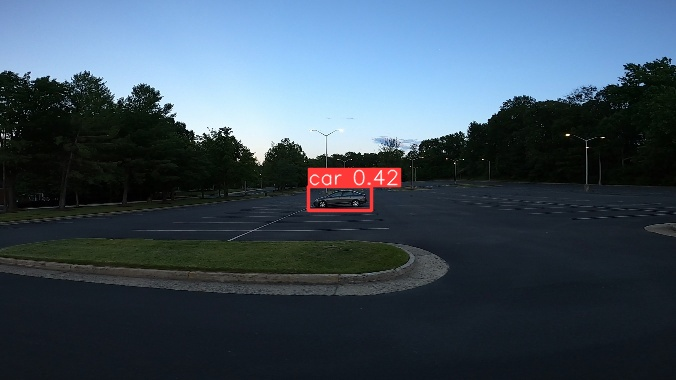

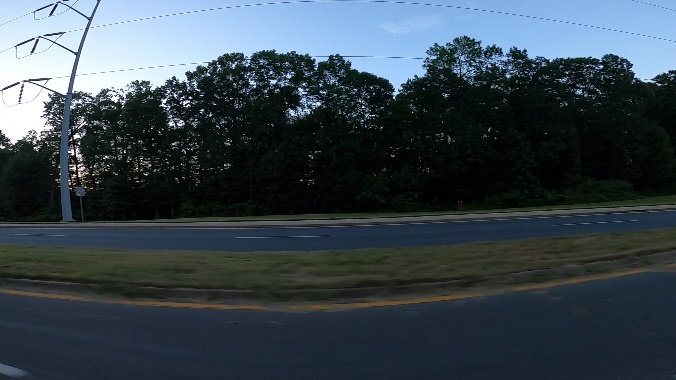

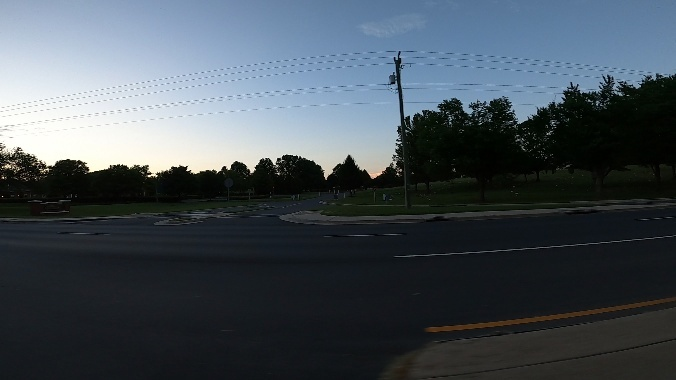

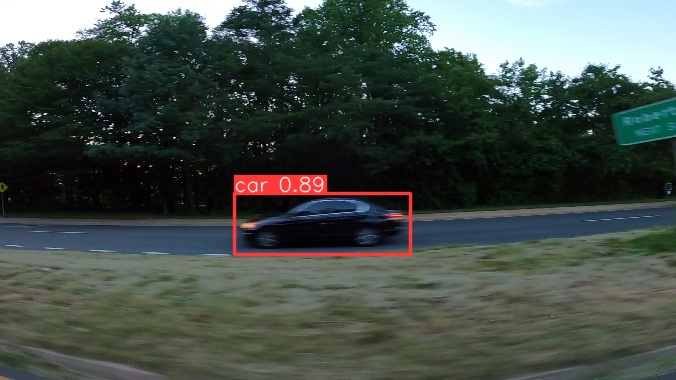

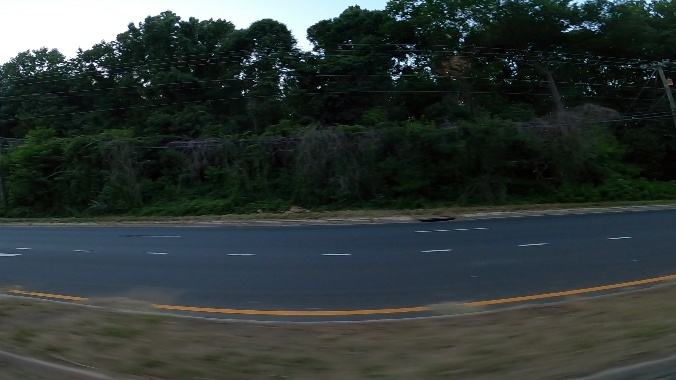

In [21]:
files = glob.glob("./runs/detect/predict/*")
for i in range(0, 30, 1):
    img = Image(files[i])
    display(img)